# Emotion Analysis of Tweets by Political Candidates in the 2019 Indian Election.

### To constitute India's 17th Lok Sabha, general elections were held in April–May 2019. The results were announced on 23 May 2019. The main contenders were two alliance groups of the Incumbent BJP (Candidate: Mr. Narendra Modhi) leading National Democratic Alliance (Candidate: Mr. Rahul Ghandi) and the Opposition United Progressive Alliance and Indian National Congress respectively. 
### Source: https://en.wikipedia.org/wiki/Results_of_the_2019_Indian_general_election

# Project Summary: Emotion Analysis of Tweets by Political Candidates in the 2019 Indian Election

## Objective
#### To analyze and visualize the trends in emotions expressed in tweets by the main political candidates, Rahul Gandhi and Narendra Modi, during the 2019 Indian election.

## Key Steps

#### Data Preparation
#### - Gathered tweet data for the main political candidates, Rahul Gandhi and Narendra Modi.
#### - Each tweet was annotated with an emotion (sentiment) label such as positive, negative, or neutral.

### Emotion Trend Analysis
#### - Grouped the tweet data by candidate, date, and sentiment.
#### - Counted the occurrences of each sentiment for each candidate on each date.
#### - Plotted line graphs to show how the number of tweets expressing different emotions changed over time for each candidate.

### Tweet Count Comparison
#### - Grouped the tweet data by candidate.
#### - Counted the total number of tweets for each candidate.
#### - Created a horizontal bar plot to display the tweet counts for each candidate, with counts labeled at the end of each bar for clarity.

## Visualizations

#### Emotion Trends by Candidate
#### - Line plots showing the trends in different emotions (positive, negative, neutral) for each candidate (Rahul Gandhi and Narendra Modi) over time.
#### - Enhanced readability with clear labels, legends, and grid lines.

### Tweet Counts by Candidate
#### - Horizontal bar plot comparing the total tweet counts for each candidate.
#### - Custom colors and labels to highlight the data distribution.

## Key Customizations
#### - Improved plot readability with larger fonts and clear labeling.
#### - Added count labels to bar plots for easy comparison.
#### - Enhanced plot aesthetics by removing unnecessary spines and using a tight layout to avoid overlaps.



In [7]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#open data sets
df_modi = pd.read_csv('/kaggle/input/tweetdatasets/ModiRelatedTweetsWithSentiment.csv')
df_rahul = pd.read_csv('/kaggle/input/tweetdatasets/RahulRelatedTweetsWithSentiment.csv')

In [9]:
# illustrate data frames
print("*** Modi Related Tweet Data Frame")
print(df_modi.info())
print(df_modi.describe())
print(df_modi.dtypes)
print(df_modi.head())
print(df_modi.tail())
print("*** Missing Values")
print(df_modi.isnull().sum())

*** Modi Related Tweet Data Frame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25688 entries, 0 to 25687
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25688 non-null  object
 1   Date        25685 non-null  object
 2   User        25683 non-null  object
 3   Tweet       25683 non-null  object
 4   Emotion     25681 non-null  object
dtypes: object(5)
memory usage: 1003.6+ KB
None
       Unnamed: 0                       Date            User  \
count       25688                      25685           25683   
unique      25688                      25621           14116   
top         25682  2019-04-05 07:22:53+00:00  LaksshyaAdvani   
freq            1                          2             136   

                                                    Tweet Emotion  
count                                               25683   25681  
unique                                              25683       2  
top  

In [10]:
# There are some missing values, lets drop those recs
df_modi.dropna(inplace=True)

In [11]:
df_modi.isnull().sum()

Unnamed: 0    0
Date          0
User          0
Tweet         0
Emotion       0
dtype: int64

In [12]:
#Now No missing Values
df_modi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25681 entries, 0 to 25687
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25681 non-null  object
 1   Date        25681 non-null  object
 2   User        25681 non-null  object
 3   Tweet       25681 non-null  object
 4   Emotion     25681 non-null  object
dtypes: object(5)
memory usage: 1.2+ MB


In [13]:
print("*** Rahul Related Tweets")
print(df_rahul.info())
print(df_rahul.describe())
print(df_rahul.dtypes)
print(df_rahul.head())
print(df_rahul.tail())
print("*** Missing Values")
print(df_rahul.isnull().sum())

*** Rahul Related Tweets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14261 entries, 0 to 14260
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  14261 non-null  int64 
 1   Date        14261 non-null  object
 2   User        14261 non-null  object
 3   Tweet       14261 non-null  object
 4   Emotion     14261 non-null  object
dtypes: int64(1), object(4)
memory usage: 557.2+ KB
None
         Unnamed: 0
count  14261.000000
mean    7130.000000
std     4116.940429
min        0.000000
25%     3565.000000
50%     7130.000000
75%    10695.000000
max    14260.000000
Unnamed: 0     int64
Date          object
User          object
Tweet         object
Emotion       object
dtype: object
   Unnamed: 0                       Date             User  \
0           0  2019-05-18 19:49:52+00:00     Sunnysweet16   
1           1  2019-05-18 18:56:52+00:00    drnitinchaube   
2           2  2019-05-18 18:54:01+00:00        

In [14]:
# There are no any missing values for Rahul

In [15]:
# Let's combine two data frames into one, then we can easily compare the results
df_modi['Candidate']='Modi'
df_rahul['Candidate']='Rahul'
df = pd.concat([ df_modi[['Candidate','Date','Tweet','Emotion']],df_rahul[['Candidate','Date','Tweet','Emotion']] ])
df

,Candidate,Date,Tweet,Emotion
0,Modi,2019-05-18 23:50:47+00:00,@anjanaomkashyap I am seeing you as future #bj...,neg
1,Modi,2019-05-18 23:00:03+00:00,#LokSabhaElections2019 \n23rd May 2019 will re...,neg
2,Modi,2019-05-18 22:53:54+00:00,#LokSabhaElections2019 \n23rd May 2019 will re...,neg
3,Modi,2019-05-18 22:20:48+00:00,PM Modi creates a new record of being the only...,pos
4,Modi,2019-05-18 21:22:29+00:00,@abhijitmajumder Appointment of Successor! \n\...,pos
...,...,...,...,...
14256,Rahul,2019-03-23 04:53:54+00:00,"@quizzicalguy In this #LokSabhaElections2019, ...",pos
14257,Rahul,2019-03-17 08:53:28+00:00,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,neg
14258,Rahul,2019-03-06 10:20:09+00:00,@sherryontopp Early morning #political move af...,neg
14259,Rahul,2019-03-06 10:18:02+00:00,@mayankgandhi04 @mallesh_2004 Early morning #p...,neg


## Exploratory Data Analysis - EDA

In [16]:
df.rename(columns={'Emotion': 'Sentiment'}, inplace=True)

# Replace 'pos' and 'neg' with 'Positive' and 'Negative'
df['Sentiment'] = df['Sentiment'].replace({'pos': 'Positive', 'neg': 'Negative'})

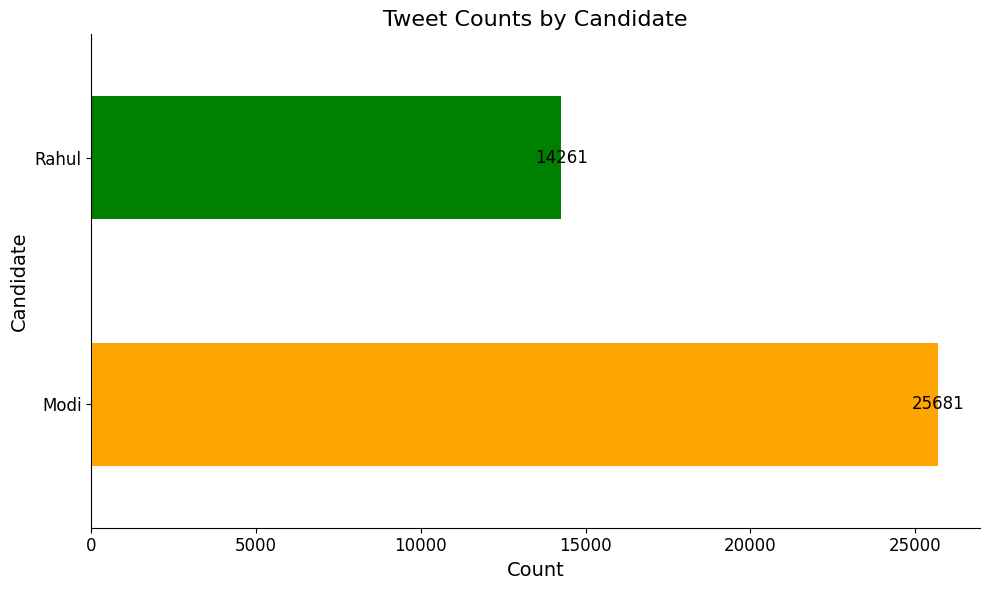

In [17]:
import matplotlib.pyplot as plt

# Group by 'Candidate' and count the occurrences
candidate_counts = df.groupby('Candidate').size()

# Create the bar plot with custom colors
colors = ['orange', 'green']  # Assign specific colors to each bar
ax = candidate_counts.plot(kind='barh', color=colors, figsize=(10, 6))

# Add count labels at the end of each bar
for i in ax.patches:
    ax.text(i.get_width() + 0.3, i.get_y() + i.get_height() / 2, 
            str(int(i.get_width())), 
            ha='center', va='center', fontsize=12, color='black')

# Customize the plot appearance
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Candidate', fontsize=14)
plt.title('Tweet Counts by Candidate', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


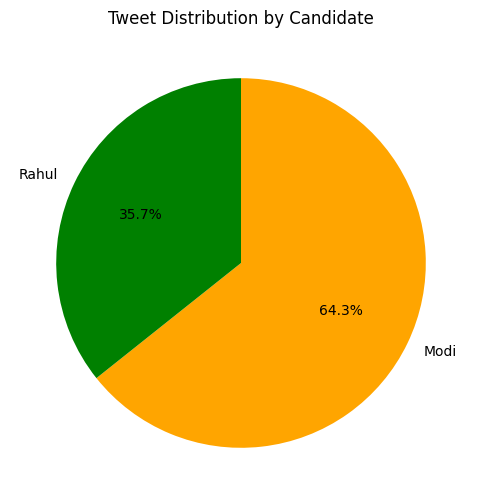

In [18]:
# Group by 'Candidate' and count the occurrences
candidate_counts = df.groupby('Candidate').size()

# Define colors for the pie chart
colors = ['orange', 'green']

# Create the pie chart
plt.figure(figsize=(8, 6))
candidate_counts.plot(kind='pie', colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False)

# Customize the plot appearance
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.ylabel('')  # Remove the default ylabel
plt.title('Tweet Distribution by Candidate')

# Show the plot
plt.show()

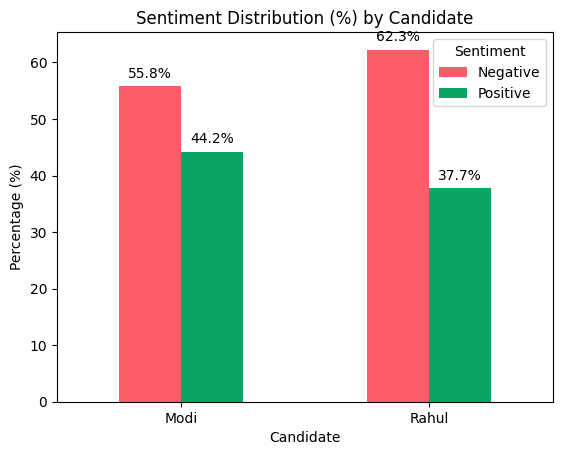

In [19]:
# Group emotions by candidate and sentiment
emotion_counts = df.groupby(['Candidate', 'Sentiment']).size().unstack(fill_value=0)

#Calculate total sentiment count per candidate (row-wise sum)
total_count_per_candidate = emotion_counts.sum(axis=1)

# Calculate percentages for each sentiment category
percentages = emotion_counts.div(total_count_per_candidate, axis=0) * 100

# Create the bar chart
percentages.plot(kind='bar', stacked=False, color=['#FC5D68', '#09A563'])  # Set your desired colors

# Customize plot
plt.title('Sentiment Distribution (%) by Candidate')
plt.xlabel('Candidate')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Sentiment')

# Add percentage labels on top of bars
for bar_container in plt.gca().containers:
    for bar in bar_container:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

plt.show()

In [20]:
#Let's group the tweets by candicate, sentimentes
result=df.groupby(['Candidate', 'Sentiment']).size().unstack(fill_value=0)
print("*** Distribution of Sentiment by Candidates")
print(result)
print("*** Totals:")
print(result.sum(axis=1))

*** Distribution of Sentiment by Candidates
Sentiment  Negative  Positive
Candidate                    
Modi          14320     11361
Rahul          8878      5383
*** Totals:
Candidate
Modi     25681
Rahul    14261
dtype: int64


### The Data Frame is inblanced, where 'Modi' has significant more entries compaired to 'Rahul'.
### It is understood that this a "Natural Inbalance" since the world-senario inherently lead because Modi is the president/leader of the country at that time.
### We use Under-sampling method to remove from the majority class ('Modi') to match the size of the minority class to balance the distribution. 

In [21]:
# Identify Minority and Majority Classes
candidate_counts = df['Candidate'].value_counts()
majority_class = candidate_counts.idxmax()
minority_class_count = candidate_counts.min()
print(f' Majority Class: {majority_class}')
print(f' Minority Class count: {minority_class_count}')

 Majority Class: Modi
 Minority Class count: 14261


In [22]:
# Under-Sampling majority class
# Randomly sample entries from the majority class to match the minority class size
majority_class_df = df[df['Candidate'] == majority_class]
undersampled_majority_class = majority_class_df.sample(minority_class_count, random_state=42)  # Set random_state for reproducibility

# Combine undersampled majority with minority class for balanced data
balanced_df = pd.concat([undersampled_majority_class, df[df['Candidate'] != majority_class]])
balanced_df

,Candidate,Date,Tweet,Sentiment
18990,Modi,2019-04-12 03:53:59+00:00,#NaMoForNewIndia\n#LokSabhaElections2019 \n#Na...,Positive
6830,Modi,2019-04-04 19:17:55+00:00,@narendramodi I am proud of Rajakeeya Bhishma ...,Positive
12389,Modi,2019-02-20 11:30:19+00:00,@jayantrld These people just know how to play ...,Negative
6769,Modi,2019-04-05 06:38:37+00:00,@ANI But PM Mr.#NarendraModi sidelined sri #LK...,Negative
5466,Modi,2019-04-11 12:23:39+00:00,"@htTweets @RahulGandhi Fuck, its clearly visib...",Negative
...,...,...,...,...
14256,Rahul,2019-03-23 04:53:54+00:00,"@quizzicalguy In this #LokSabhaElections2019, ...",Positive
14257,Rahul,2019-03-17 08:53:28+00:00,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,Negative
14258,Rahul,2019-03-06 10:20:09+00:00,@sherryontopp Early morning #political move af...,Negative
14259,Rahul,2019-03-06 10:18:02+00:00,@mayankgandhi04 @mallesh_2004 Early morning #p...,Negative


In [23]:
#Let's group the tweets by candicate, sentimentes
df_b=balanced_df.groupby(['Candidate', 'Sentiment']).size().unstack(fill_value=0)
print("*** Balanced Data: Distribution of Sentiment by Candidates")
print(df_b)
print("*** Totals:")
print(df_b.sum(axis=1))

*** Balanced Data: Distribution of Sentiment by Candidates
Sentiment  Negative  Positive
Candidate                    
Modi           7948      6313
Rahul          8878      5383
*** Totals:
Candidate
Modi     14261
Rahul    14261
dtype: int64


In [24]:
#balanced_df=df
balanced_df

,Candidate,Date,Tweet,Sentiment
18990,Modi,2019-04-12 03:53:59+00:00,#NaMoForNewIndia\n#LokSabhaElections2019 \n#Na...,Positive
6830,Modi,2019-04-04 19:17:55+00:00,@narendramodi I am proud of Rajakeeya Bhishma ...,Positive
12389,Modi,2019-02-20 11:30:19+00:00,@jayantrld These people just know how to play ...,Negative
6769,Modi,2019-04-05 06:38:37+00:00,@ANI But PM Mr.#NarendraModi sidelined sri #LK...,Negative
5466,Modi,2019-04-11 12:23:39+00:00,"@htTweets @RahulGandhi Fuck, its clearly visib...",Negative
...,...,...,...,...
14256,Rahul,2019-03-23 04:53:54+00:00,"@quizzicalguy In this #LokSabhaElections2019, ...",Positive
14257,Rahul,2019-03-17 08:53:28+00:00,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,Negative
14258,Rahul,2019-03-06 10:20:09+00:00,@sherryontopp Early morning #political move af...,Negative
14259,Rahul,2019-03-06 10:18:02+00:00,@mayankgandhi04 @mallesh_2004 Early morning #p...,Negative


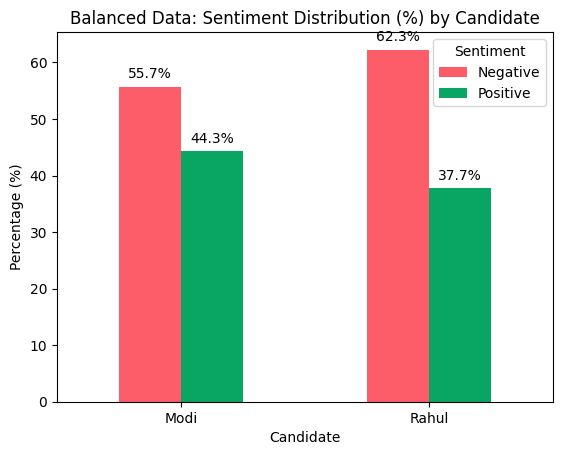

In [25]:
# Group emotions by candidate and sentiment
b_emotion_counts = balanced_df.groupby(['Candidate', 'Sentiment']).size().unstack(fill_value=0)

#Calculate total sentiment count per candidate (row-wise sum)
b_total_count_per_candidate = b_emotion_counts.sum(axis=1)

# Calculate percentages for each sentiment category
b_percentages = b_emotion_counts.div(b_total_count_per_candidate, axis=0) * 100

# Create the bar chart
b_percentages.plot(kind='bar', stacked=False, color=['#FC5D68', '#09A563'])  # Set your desired colors

# Customize plot
plt.title('Balanced Data: Sentiment Distribution (%) by Candidate')
plt.xlabel('Candidate')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Sentiment')

# Add percentage labels on top of bars
for bar_container in plt.gca().containers:
    for bar in bar_container:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

plt.show()

### Balance data treatment has been applied without harming the real senario....**

# Emotional Analysis
## Sentiment Analysis of Comments with pysentimiento

### This script demonstrates how to analyze the sentiment of comments using a pre-trained transformer model from the pysentimiento library. This allows us to understand the emotional tone behind the comments, which can be valuable for various tasks like customer feedback analysis or social media monitoring.

In [26]:
!pip install pysentimiento

In [27]:
from pysentimiento import create_analyzer
emotion_analyzer = create_analyzer(task="emotion", lang="en")

2024-06-23 09:43:33.393467: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 09:43:33.393565: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-23 09:43:33.577505: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/999 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/295 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [28]:
df

,Candidate,Date,Tweet,Sentiment
0,Modi,2019-05-18 23:50:47+00:00,@anjanaomkashyap I am seeing you as future #bj...,Negative
1,Modi,2019-05-18 23:00:03+00:00,#LokSabhaElections2019 \n23rd May 2019 will re...,Negative
2,Modi,2019-05-18 22:53:54+00:00,#LokSabhaElections2019 \n23rd May 2019 will re...,Negative
3,Modi,2019-05-18 22:20:48+00:00,PM Modi creates a new record of being the only...,Positive
4,Modi,2019-05-18 21:22:29+00:00,@abhijitmajumder Appointment of Successor! \n\...,Positive
...,...,...,...,...
14256,Rahul,2019-03-23 04:53:54+00:00,"@quizzicalguy In this #LokSabhaElections2019, ...",Positive
14257,Rahul,2019-03-17 08:53:28+00:00,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,Negative
14258,Rahul,2019-03-06 10:20:09+00:00,@sherryontopp Early morning #political move af...,Negative
14259,Rahul,2019-03-06 10:18:02+00:00,@mayankgandhi04 @mallesh_2004 Early morning #p...,Negative


## Intergrate with the Emotion Model and update Emotions

In [29]:
output=emotion_analyzer.predict(balanced_df.Tweet.iloc[0])

In [30]:
from typing import DefaultDict, List

sentiments = DefaultDict(list)
for tweet in balanced_df.Tweet:
  probas = emotion_analyzer.predict(tweet).probas
  for key, value in probas.items():
    sentiments[key].append(value)

In [31]:
for key, value in sentiments.items():
  #
    balanced_df[key] = value
balanced_df

,Candidate,Date,Tweet,Sentiment,others,joy,sadness,anger,surprise,disgust,fear
18990,Modi,2019-04-12 03:53:59+00:00,#NaMoForNewIndia\n#LokSabhaElections2019 \n#Na...,Positive,0.710729,0.278881,0.001692,0.002172,0.001965,0.002140,0.002421
6830,Modi,2019-04-04 19:17:55+00:00,@narendramodi I am proud of Rajakeeya Bhishma ...,Positive,0.061640,0.930513,0.001596,0.001954,0.001666,0.001240,0.001391
12389,Modi,2019-02-20 11:30:19+00:00,@jayantrld These people just know how to play ...,Negative,0.007940,0.000879,0.002602,0.016653,0.001034,0.969662,0.001230
6769,Modi,2019-04-05 06:38:37+00:00,@ANI But PM Mr.#NarendraModi sidelined sri #LK...,Negative,0.911010,0.004932,0.002354,0.003335,0.002540,0.073760,0.002070
5466,Modi,2019-04-11 12:23:39+00:00,"@htTweets @RahulGandhi Fuck, its clearly visib...",Negative,0.712029,0.006002,0.001318,0.052311,0.004027,0.221262,0.003051
...,...,...,...,...,...,...,...,...,...,...,...
14256,Rahul,2019-03-23 04:53:54+00:00,"@quizzicalguy In this #LokSabhaElections2019, ...",Positive,0.979237,0.007964,0.000728,0.001611,0.003902,0.003763,0.002796
14257,Rahul,2019-03-17 08:53:28+00:00,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,Negative,0.019341,0.001099,0.001095,0.020491,0.002148,0.954523,0.001303
14258,Rahul,2019-03-06 10:20:09+00:00,@sherryontopp Early morning #political move af...,Negative,0.246248,0.003167,0.001893,0.009921,0.002468,0.732532,0.003771
14259,Rahul,2019-03-06 10:18:02+00:00,@mayankgandhi04 @mallesh_2004 Early morning #p...,Negative,0.131461,0.002373,0.001711,0.009915,0.001990,0.849429,0.003121


In [52]:
#print(balanced_df[balanced_df['others'] > 0.5])
#n=1000
#for index, row in balanced_df.iterrows():
#      if row['others']>.5:
#            tweet = row['Tweet']  # Access the tweet text using the column name
#            print(tweet)
#            n+=1
#            if n==1000:
#                exit

In [32]:
balanced_df_data= balanced_df.drop(columns=['Date','Tweet','Sentiment'])
balanced_df_data

,Candidate,others,joy,sadness,anger,surprise,disgust,fear
18990,Modi,0.710729,0.278881,0.001692,0.002172,0.001965,0.002140,0.002421
6830,Modi,0.061640,0.930513,0.001596,0.001954,0.001666,0.001240,0.001391
12389,Modi,0.007940,0.000879,0.002602,0.016653,0.001034,0.969662,0.001230
6769,Modi,0.911010,0.004932,0.002354,0.003335,0.002540,0.073760,0.002070
5466,Modi,0.712029,0.006002,0.001318,0.052311,0.004027,0.221262,0.003051
...,...,...,...,...,...,...,...,...
14256,Rahul,0.979237,0.007964,0.000728,0.001611,0.003902,0.003763,0.002796
14257,Rahul,0.019341,0.001099,0.001095,0.020491,0.002148,0.954523,0.001303
14258,Rahul,0.246248,0.003167,0.001893,0.009921,0.002468,0.732532,0.003771
14259,Rahul,0.131461,0.002373,0.001711,0.009915,0.001990,0.849429,0.003121


In [73]:
balanced_df_data

,Candidate,others,joy,sadness,anger,surprise,disgust,fear,Other
18990,Modi,0.710729,0.278881,0.001692,0.002172,0.001965,0.002140,0.002421,0.716806
6830,Modi,0.061640,0.930513,0.001596,0.001954,0.001666,0.001240,0.001391,0.066293
12389,Modi,0.007940,0.000879,0.002602,0.016653,0.001034,0.969662,0.001230,0.012806
6769,Modi,0.911010,0.004932,0.002354,0.003335,0.002540,0.073760,0.002070,0.917973
5466,Modi,0.712029,0.006002,0.001318,0.052311,0.004027,0.221262,0.003051,0.720425
...,...,...,...,...,...,...,...,...,...
14256,Rahul,0.979237,0.007964,0.000728,0.001611,0.003902,0.003763,0.002796,0.986662
14257,Rahul,0.019341,0.001099,0.001095,0.020491,0.002148,0.954523,0.001303,0.023886
14258,Rahul,0.246248,0.003167,0.001893,0.009921,0.002468,0.732532,0.003771,0.254379
14259,Rahul,0.131461,0.002373,0.001711,0.009915,0.001990,0.849429,0.003121,0.138283


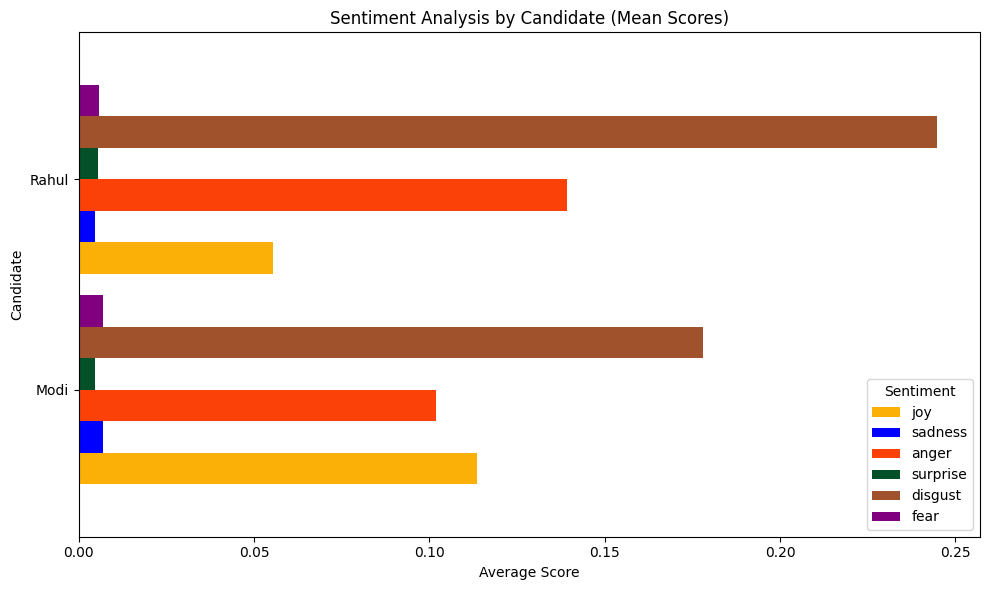

In [140]:
# Filter out unwanted columns
balanced_df_data_filter = balanced_df_data.drop(columns=['others','Other']) # let's remove the other colums since those are unrelevent comments to the selected emotions.

# Group data by candidate and calculate mean sentiment scores
df_grouped = balanced_df_data_filter.groupby('Candidate').mean()

df_grouped.reset_index(inplace=True)

# Create horizontal bar chart
df_grouped.set_index('Candidate', inplace=True)
ax = df_grouped.plot(kind='barh', figsize=(10, 6), width=0.9,color=['#FBB008', '#0000ff','#FB4108','#045029','#a0522d','#800080'])  # Adjust figure size as needed



plt.title('Sentiment Analysis by Candidate (Mean Scores)')
plt.xlabel('Average Score')
plt.ylabel('Candidate')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

## Conclusion: Sentiment Distribution - Modi vs. Rahul
## Our analysis of sentiment distribution in comments related to Modi and Rahul reveals distinct patterns:

### Modi-related Comments: The sentiments of joy, sadness, and fear are predominantly associated with comments about Modi.
### Rahul-related Comments: Comments about Rahul show higher associations with anger, surprise, and disgust.
### Significant Ratios: The ratios of disgust, anger, and joy exhibit notable differences, underscoring the varying emotional responses elicited by each figure.



## Emotion Classification
#### Emotions can often be classified into broader categories based on their characteristics and typical expressions. Here's a common classification for the emotions based on the ones you've listed:

### Positive Emotions:
#### - Joy: A feeling of happiness or pleasure.
#### - Surprise: Feeling startled or amazed.

### Negative Emotions:
#### - Sadness: Feeling unhappy, sorrowful, or disappointed.
#### - Anger: Feeling irritated, frustrated, or hostile.
#### - Disgust: Feeling strong aversion or revulsion towards something.
#### - Fear: Feeling afraid, anxious, or scared.

##### These emotions can be grouped into positive (joy, surprise) and negative (sadness, anger, disgust, fear) categories based on their affective valence (positive or negative) and typical psychological and physiological responses.

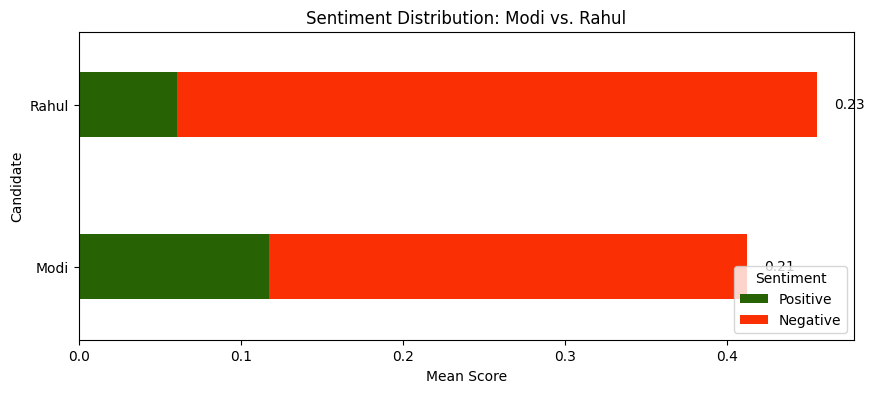

           Positive  Negative
Candidate                    
Modi       0.117563  0.294752
Rahul      0.060727  0.394429


In [144]:
# Convert data to DataFrame
summary_df = pd.DataFrame(data)
summary_df.set_index('Candidate', inplace=True)

# Define colors for positive and negative sentiments
colors = ['#276205', '#FA2F04']  # Blue for Positive, Orange for Negative

# Plotting the grouped horizontal bar chart
ax = summary_df[['Positive', 'Negative']].plot(kind='barh', width=0.4, stacked=True, color=colors, figsize=(10, 4))

# Customizing the chart
plt.title('Sentiment Distribution: Modi vs. Rahul')
plt.ylabel('Candidate')
plt.xlabel('Mean Score')

# Adding mean score values at the end of each bar
for i, (pos, neg) in enumerate(zip(summary_df['Positive'], summary_df['Negative'])):
    mean_score = (pos + neg) / 2  # Calculate mean score
    ax.text(pos + neg + 0.02, i, f'{mean_score:.2f}', ha='center', va='center', color='black')

# Adding a legend
plt.legend(['Positive', 'Negative'], title='Sentiment', loc='lower right')

# Show the plot
plt.show()
print(summary_df)

## Summary of Sentiment Analysis

### Data:
- **Modi**: Positive = 0.117563, Negative = 0.294752
- **Rahul**: Positive = 0.060727, Negative = 0.394429

### Key Observations:

#### Modi exhibits slightly higher positive emotions in comments compared to Rahul.
#### However, Rahul has a significantly higher proportion of negative emotional comments overall.
##### Remember that context and time frame play a crucial role in interpreting these sentiment scores.

## Note: Actual Result

### Source: https://en.wikipedia.org/wiki/Results_of_the_2019_Indian_general_election


### Compiled by Uditha C WICK.